In [131]:
from scipy import optimize
import numpy as np

In [144]:
def f(x): #The Ronderbrock func
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

## Play with matplot

In [145]:
%matplotlib inline
from matplotlib import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [155]:
r = np.arange(-5, 5, 0.05)
X,Y = np.meshgrid(r,r)
XY=np.array([X.flatten(),Y.flatten()]).T

In [156]:
z = np.array([f(xy) for xy in XY])

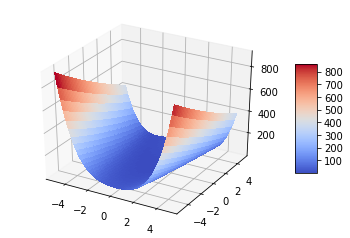

In [157]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
Z = z.reshape(X.shape)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

surf

## Solve

In [158]:
optimize.brute(f, ((-5, 5), (-5, 5)))

array([ 0.99999324,  1.00001283])

In [159]:
optimize.differential_evolution(f, ((-5, 5), (-5, 5)))

     fun: 7.3955709864469857e-32
 message: 'Optimization terminated successfully.'
    nfev: 3783
     nit: 125
 success: True
       x: array([ 1.,  1.])

In [162]:
def g(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

In [163]:
optimize.check_grad(f, g, [2, 2])

2.384185791015625e-07

In [164]:
optimize.fmin_bfgs(f, [2, 2], fprime=g)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9


array([ 1.00000582,  1.00001285])

In [165]:
optimize.minimize(f, [2, 2])

      fun: 1.7837922314048395e-11
 hess_inv: array([[ 0.95489065,  1.90006641],
       [ 1.90006641,  4.27872401]])
      jac: array([  9.88094926e-07,   2.41748031e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 1.00000573,  1.00001265])

In [166]:
optimize.minimize(f, [2, 2], method='BFGS', jac=g)

      fun: 1.8414093407262628e-11
 hess_inv: array([[ 0.95489113,  1.90006768],
       [ 1.90006768,  4.27872719]])
      jac: array([  9.88085521e-07,   2.41739812e-06])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 1.00000582,  1.00001285])

In [167]:
optimize.minimize(f, [2, 2], method='BFGS')

      fun: 1.7837922314048395e-11
 hess_inv: array([[ 0.95489065,  1.90006641],
       [ 1.90006641,  4.27872401]])
      jac: array([  9.88094926e-07,   2.41748031e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 1.00000573,  1.00001265])

In [169]:
optimize.minimize(f, [2, 2], method='Nelder-Mead')

 final_simplex: (array([[ 0.99998568,  0.99996682],
       [ 1.00002149,  1.00004744],
       [ 1.0000088 ,  1.00003552]]), array([  1.23119954e-10,   2.50768082e-10,   3.59639951e-10]))
           fun: 1.2311995365407462e-10
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 46
        status: 0
       success: True
             x: array([ 0.99998568,  0.99996682])